# Árbol de decisión para especies de flores

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

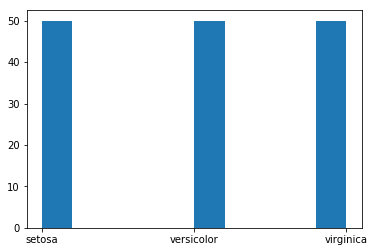

In [25]:
plt.hist(data.Species)

In [26]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [27]:
colnames = data.columns.values.tolist()
predictors = colnames[:4]
target = colnames[4]

In [28]:
import numpy as np

In [29]:
data["is_train"] = np.random.uniform(0,1,len(data))<=0.75

(array([ 43.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 107.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

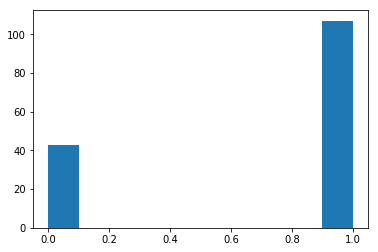

In [30]:
plt.hist(data.is_train)

In [31]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [34]:
preds = tree.predict(test[predictors])

In [35]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,15,0,0
versicolor,0,13,2
virginica,0,0,13


# Visualización del árbol de decisión

In [36]:
from sklearn.tree import export_graphviz

In [37]:
with open("resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [43]:
import os
from graphviz import Source

In [44]:
file = open("resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.584\\nsamples = 107\\nvalue = [35, 35, 37]"] ;\n1 [label="entropy = 0.0\\nsamples = 35\\nvalue = [35, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.65\\nentropy = 0.999\\nsamples = 72\\nvalue = [0, 35, 37]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.398\\nsamples = 38\\nvalue = [0, 35, 3]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 34\\nvalue = [0, 34, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.811\\nsamples = 4\\nvalue = [0, 1, 3]"] ;\n3 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 34\\nvalue = [0, 0, 34]"] ;\n2 -> 6 ;\n}'

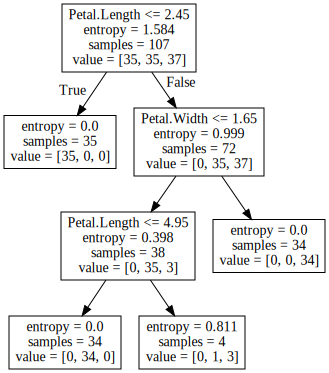

In [45]:
Source(text)

## Cross Validation para la poda

In [46]:
X = data[predictors]
Y = data[target]

In [47]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [49]:
from sklearn.model_selection import KFold

In [54]:
cv = KFold(n_splits= 10, shuffle=True, random_state=1)

In [56]:
from sklearn.model_selection import cross_val_score

In [59]:
score = np.mean(cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1))

In [60]:
score

0.9333333333333333

In [65]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits= 10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("    ", tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
     [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
     [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
     [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
     [0.         0.         0.66869158 0.33130842]


In [66]:
predictors

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']